In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy 
from sklearn.neighbors import KernelDensity

In [ ]:
# Load data
df = pd.read_csv('Empty.csv')

In [222]:
df_sub = df[(df["Phase"] == 0) & df["Behavior"].isin([0,1,2,3,4,5])] # Exclude nan
counts = df_sub.value_counts("Behavior", normalize=True).sort_index()
counts

Behavior
0.0    0.285714
1.0    0.142857
2.0    0.047619
3.0    0.523810
Name: proportion, dtype: float64

In [ ]:
# Print n and N
print('n: ' + str(len(df_sub)))
print('N: ' + str(len(df_sub.Fly.unique().tolist())))

35

In [ ]:
# Get latency to first movement 
df_RR = pd.read_csv('RR.csv')
df_RR = df_RR.dropna(subset=["Movement onset"])
latency_to_move_RR = (df_RR["Movement onset"] - df_RR["Stimulus onset"])/150
latency_to_move_RR = latency_to_move_RR.tolist()

df_MDN = pd.read_csv('MDN.csv')
df_MDN = df_MDN.dropna(subset=["Movement onset"])
latency_to_move_MDN = (df_MDN["Movement onset"] - df_MDN["Stimulus onset"])/150
latency_to_move_MDN = latency_to_move_MDN.tolist()

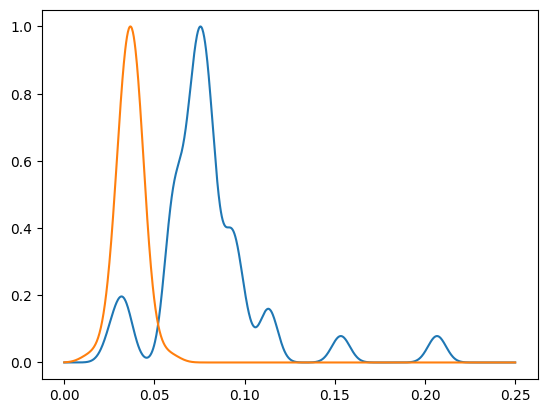

In [11]:
# Kernel density estimation
X = np.array(latency_to_move_RR)[:,np.newaxis]
X_plot = np.linspace(0,0.25,1000)[:,np.newaxis]
kde = KernelDensity(kernel="gaussian", bandwidth=0.005).fit(X)
log_dens = kde.score_samples(X_plot)

X2 = np.array(latency_to_move_MDN)[:,np.newaxis]
X2_plot = np.linspace(0,0.25,1000)[:,np.newaxis]
kde2 = KernelDensity(kernel="gaussian", bandwidth=0.005).fit(X2)
log_dens2 = kde2.score_samples(X2_plot)

plt.plot(X_plot[:, 0], np.exp(log_dens)/np.max(np.exp(log_dens)))
plt.plot(X2_plot[:, 0], np.exp(log_dens2)/np.max(np.exp(log_dens2)))
#plt.savefig(r'C:\Users\Chris\Desktop\gap-crossing.eps', format='eps', transparent=True)
plt.show()

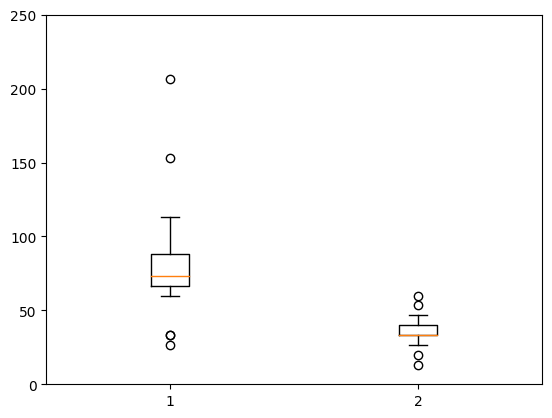

In [227]:
# Plot latency to first movement
plt.boxplot([latency_to_move_RR, latency_to_move_MDN], positions=[1,2])
plt.ylim([0,250])
#plt.savefig(r'C:\Users\Chris\Desktop\gap-crossing.eps', format='eps', transparent=True)
plt.show()

In [ ]:
np.median(latency_to_move_RR)

73.33333333333333

In [228]:
# Mann-Whitney U test for non-normally distributed (nonparametric) data
scipy.stats.mannwhitneyu(latency_to_move_RR,latency_to_move_MDN)

MannwhitneyuResult(statistic=2995.5, pvalue=6.4169107680108535e-15)

In [ ]:
# Get duration of cross 
onset_type = "Crossing onset FL1"

df_ctrl = pd.read_csv('Empty.csv')
df_ctrl = df_ctrl.dropna(subset=[onset_type])
duration_of_cross_ctrl = (df_ctrl["Crossing offset"] - df_ctrl[onset_type])/150
duration_of_cross_ctrl = duration_of_cross_ctrl.tolist()
#duration_of_cross_ctrl = [duration for duration in duration_of_cross_ctrl if not pd.isnull(duration)] # Remove nan

df_RR = pd.read_csv('RR.csv')
df_RR = df_RR.dropna(subset=[onset_type])
duration_of_cross_RR = (df_RR["Crossing offset"] - df_RR[onset_type])/150
duration_of_cross_RR = duration_of_cross_RR.tolist()
#duration_of_cross_RR = [duration for duration in duration_of_cross_RR if not pd.isnull(duration)] # Remove nan

In [234]:
len(duration_of_cross_RR)

59

In [232]:
np.median(duration_of_cross_RR)

0.6333333333333333

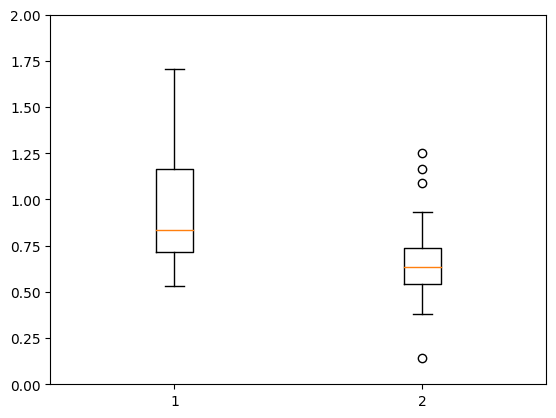

In [4]:
# Plot duration of cross
plt.boxplot([duration_of_cross_ctrl, duration_of_cross_RR], positions=[1,2])
plt.ylim([0,2])
#plt.savefig(r'C:\Users\Chris\Desktop\gap-crossing.eps', format='eps', transparent=True)
plt.show()

In [236]:
# Test for normality 
scipy.stats.normaltest(duration_of_cross_ctrl)

NormaltestResult(statistic=5.107287651646968, pvalue=0.07779766774455948)

In [237]:
# Mann-Whitney U test for non-normally distributed (nonparametric) data
scipy.stats.mannwhitneyu(duration_of_cross_ctrl,duration_of_cross_RR)

MannwhitneyuResult(statistic=1928.0, pvalue=0.00022799657869984862)

In [133]:
# T-test for normally distributed (parametric) data
scipy.stats.ttest_ind(duration_of_cross_ctrl,duration_of_cross_RR)

TtestResult(statistic=5.029201798454666, pvalue=3.1344154228256223e-06, df=77.0)

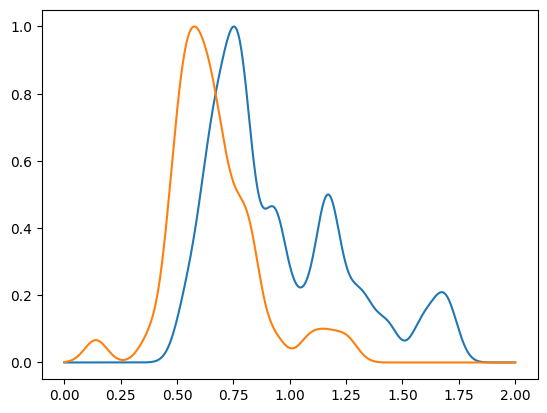

In [8]:
# Kernel density estimation
X = np.array(duration_of_cross_ctrl)[:,np.newaxis]
X_plot = np.linspace(0,2,1000)[:,np.newaxis]
kde = KernelDensity(kernel="gaussian", bandwidth=0.05).fit(X)
log_dens = kde.score_samples(X_plot)

X2 = np.array(duration_of_cross_RR)[:,np.newaxis]
X2_plot = np.linspace(0,2,1000)[:,np.newaxis]
kde2 = KernelDensity(kernel="gaussian", bandwidth=0.05).fit(X2)
log_dens2 = kde2.score_samples(X2_plot)

plt.plot(X_plot[:, 0], np.exp(log_dens)/np.max(np.exp(log_dens)))
plt.plot(X2_plot[:, 0], np.exp(log_dens2)/np.max(np.exp(log_dens2)))
#plt.savefig(r'C:\Users\Chris\Desktop\gap-crossing.eps', format='eps', transparent=True)
plt.show()

(0.0, 2.0)

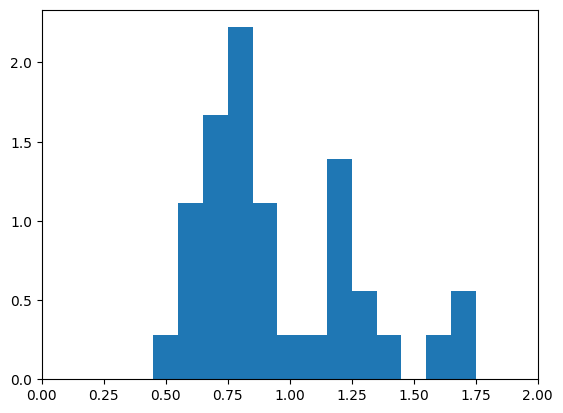

In [7]:
bin_width = 0.1
bins = np.arange(0-bin_width/2, 2+bin_width, bin_width)
plt.hist(duration_of_cross_ctrl, bins=bins, density=True)
plt.xlim([0,2])

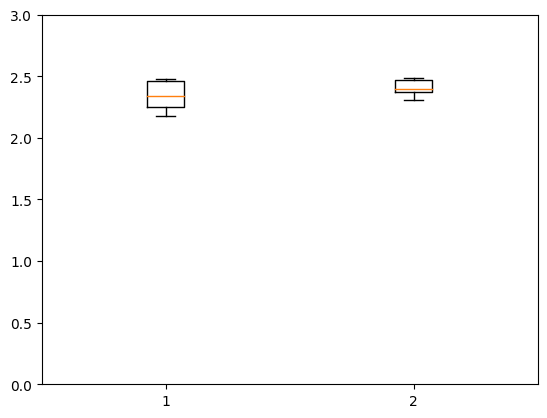

In [240]:
# Ctrl flies: 1, 2, 3, 4, 6, 7, 8, 9, 11, 12, 13
body_lengths_ctrl = [2.25, 2.38, 2.46, 2.24, 2.47, 2.34, 2.30, 2.48, 2.47, 2.25, 2.18]

# RR flies: 1, 2, 3, 4, 5, 5, 8, 9, 10, 11 
body_lengths_RR = [2.39, 2.49, 2.49, 2.44, 2.31, 2.48, 2.41, 2.38, 2.37, 2.37]

plt.boxplot([body_lengths_ctrl, body_lengths_RR], positions=[1,2])
plt.ylim([0,3])
#plt.savefig(r'C:\Users\Chris\Desktop\gap-crossing.eps', format='eps', transparent=True)
plt.show()

In [245]:
np.median(body_lengths_ctrl)

2.34

In [246]:
np.median(body_lengths_RR)

2.4000000000000004

In [247]:
scipy.stats.mannwhitneyu(body_lengths_ctrl,body_lengths_RR)

MannwhitneyuResult(statistic=33.0, pvalue=0.1292812360557783)